In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
path = "ex1data2.txt"
data = pd.read_csv(path, header=None, names=["sizes", "num", "price"])
data.head()

,sizes,num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [174]:
def normalize_feature(data):
    return data.apply(lambda column: (column - column.mean()) / column.std())

In [175]:
data = normalize_feature(data)
data.head()

,sizes,num,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [176]:
def computeCost(X, y, theta):
    return np.sum(np.power((X * theta.T - y), 2)) / (len(X) * 2)


In [177]:
data.insert(0, "ones", 1)


In [178]:
cols = data.shape[1]
# print(data.shape[1])
X = data.iloc[:, :cols-1]
y = data.iloc[:, cols-1:cols]
theta = np.matrix(np.array(range(cols-1)))

#！！！
X = np.matrix(X.values)
y = np.matrix(y.values)

In [179]:
alpha = 0.003
intes = 10000

In [180]:
computeCost(X, y, theta)
#ValueError: Unable to coerce to DataFrame, shape must be (47, 3): given (3, 1)
#这表示不能将panda中的dataframe与np中矩阵相乘    

2.32977725017388

In [181]:
def gradientdescent(X, y, theta, alpha, intes):
    parameters = X.shape[1]
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(intes)

    for i in range(intes):
        error = X * theta.T - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
    
    return cost, theta

In [182]:
cost, g = gradientdescent(X, y, theta, alpha, intes)
g

matrix([[-1.10989232e-16,  8.84763635e-01, -5.31764671e-02]])

In [183]:
data.sizes.min(), data.num.max(), data.num.min()

(-1.4454227371491544, 2.4045082620623597, -2.8518586363995424)

In [184]:
computeCost(X, y, g)


0.13068648054142562

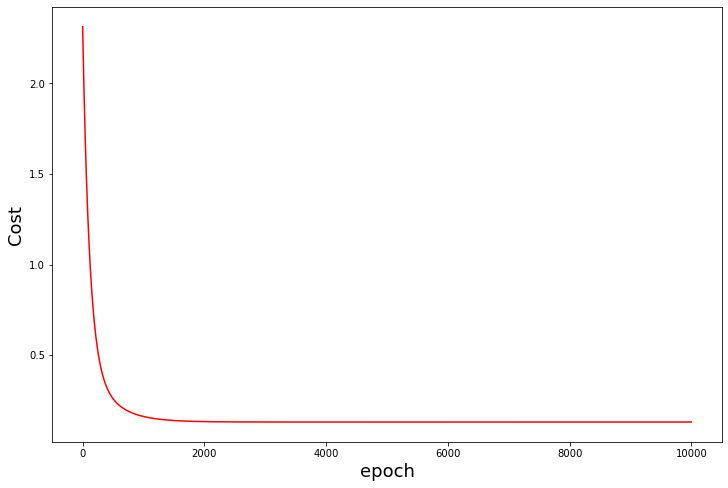

In [185]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(intes), cost, 'r')
ax.set_xlabel('epoch',fontsize=18)
ax.set_ylabel('Cost', fontsize=18)
plt.show()